In [30]:
import json
import glob
import random

import geopandas
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib


SHP_INPUT_PATH = './data/treesAsPoints/stromy.shp'
JSON_OUTPUT_PATH = './data/treesAsPoints/stromy.geojson'

In [31]:
%matplotlib inline

In [173]:
shp_file = geopandas.read_file(SHP_INPUT_PATH)
shp_file.to_crs('EPSG:4326').to_file(JSON_OUTPUT_PATH, driver='GeoJSON')

In [2]:
with open(JSON_OUTPUT_PATH, 'r') as f:
    trees_geojson = json.load(f)

In [3]:
trees_geojson_sample = trees_geojson.copy()
trees_geojson_sample["features"] = random.sample(trees_geojson["features"], 10000)

In [ ]:
fig = go.Figure(go.Scattermapbox())

fig.update_layout(
    mapbox = {
        'style': "carto-positron",
        'center': {
            'lon': 17.1077, 
            'lat': 48.1486
        },
        'zoom': 11, 
        'layers': [
            {
                'sourcetype': 'geojson',
                'source': trees_geojson_sample,
                'type': 'circle',
                'color': 'rgba(50,205,50, 0.75)',
                'circle': {
                    'radius': 3
                },
            },
        ]
    },
    margin = {'l':0, 'r':0, 'b':0, 't':0},
)

fig.show(hoverinfo='lon+lat')

In [4]:
step = 0.00001
co2_multiplier = 1.3
to_bin = lambda x: np.floor(x / step) * step


path = './data/bus/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

bus = pd.concat(li, axis=0, ignore_index=True)

# bus = pd.read_csv('./data/bus/CLIMATHON_BUSES_01_2019_BRATISLAVA_BUSES.csv')

# Convert data types to float
bus["LAT"] = bus["LAT"].str.replace(',', '.').astype(float)
bus["LON"] = bus["LON"].str.replace(',', '.').astype(float)

# Create lat/lon bins to group close points
bus["latbin"] = bus.LAT.map(to_bin)
bus["lonbin"] = bus.LON.map(to_bin)

# Groupby close lat/lon points
groups = bus.groupby(by=["latbin", "lonbin"])
result = groups.count()

# Calculate "co2" for a given map point and reset index
result["co2"] = result['DATE'] * co2_multiplier
result.reset_index(inplace=True)

In [14]:
step = 0.0001
co2_multiplier = 1.3
to_bin = lambda x: np.floor(x / step) * step

# Create lat/lon bins to group close points
bus["latbin"] = bus.LAT.map(to_bin)
bus["lonbin"] = bus.LON.map(to_bin)

# Groupby close lat/lon points
groups = bus.groupby(by=["latbin", "lonbin"])
result = groups.count()

# Calculate "co2" for a given map point and reset index
result["co2"] = result['DATE'] * co2_multiplier
result.reset_index(inplace=True)

result.count()

latbin            23454
lonbin            23454
DATE              23454
TIME              23454
VEHICLE_NUMBER    23454
LINE              23454
DIRECTION         23454
SERIAL_NUMBER     23454
LON               23454
LAT               23454
DELAY             23454
STOP_NUMBER       23454
STOP_NAME         23454
DOORS             23454
co2               23454
dtype: int64

In [10]:
result

latbin   lonbin  DATE  TIME  VEHICLE_NUMBER  LINE  DIRECTION  \
0      0.00     0.00  1340  1340            1340  1340       1340   
1     48.09    17.10   459   459             459   459        459   
2     48.09    17.11   944   944             944   944        944   
3     48.09    17.12  1866  1866            1866  1866       1866   
4     48.10    17.10  1214  1214            1214  1214       1214   
..      ...      ...   ...   ...             ...   ...        ...   
78    48.18    17.15    41    41              41    41         41   
79    48.18    17.16   125   125             125   125        125   
80    48.19    17.02  4686  4686            4686  4686       4686   
81    48.19    17.03  8245  8245            8245  8245       8245   
82  4294.96  4294.96  3211  3211            3211  3211       3211   

    SERIAL_NUMBER   LON   LAT  DELAY  STOP_NUMBER  STOP_NAME  DOORS      co2  
0            1340  1340  1340   1340         1340       1340   1340   1742.0  
1             459   459   459    459          457        459    459    596.7  
2             944   944   944    944          940        944    944   1227.2  
3            1866  1866  1866   1866         1859       1866   1866   2425.8  
4            1214  1214  1214   1214         1208       1214   1214   1578.2  
..            ...   ...   ...    ...          ...        ...    ...      ...  
78             41    41    41     41           41         41     41     53.3  
79            125   125   125    125          117        125    125    162.5  
80           4686  4686  4686   4686         4650       4686   4686   6091.8  
81           8245  8245  8245   8245         8202       8245   8245  10718.5  
82           3211  3211  3211   3211         3201       3211   3211   4174.3  

[83 rows x 15 columns]

In [15]:
fig = go.Figure(
    go.Densitymapbox(
        lat=result.latbin, lon=result.lonbin, z=result.co2, radius=10
    )
)
fig.update_layout(
    mapbox={
        'style': 'carto-positron',
        'zoom': 11,
        'center': {
            'lon': 17.1077, 
            'lat': 48.1486
        },
        'layers': [
#             {
#                 'sourcetype': 'geojson',
#                 'source': trees_geojson_sample,
#                 'type': 'circle',
#                 'color': 'rgba(50,205,50, 0.5)',
#                 'circle': {
#                     'radius': 3
#                 },
#             },
        ]
    }
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Load bus lines as a spatial data and calculate carbon emissions per year

In [16]:
df = geopandas.read_file('./data/bus/bus_lines.geojson')
df.head()

osm_id                               name   type  \
0  17206                        Donauradweg  route   
1  37872                                 D1  route   
2  38441                              E 575  route   
3  52081                               None  route   
4  63311  S7: Laa an der Thaya => Wolfsthal  route   

                                          other_tags  \
0  "description"=>"Alle Abschnitte des Donauradwe...   
1  "name:cs"=>"Dálnice D1 (Slovensko)","name:en"=...   
2  "description:fr"=>"E 575 Bratislava - Győr","n...   
3  "colour"=>"yellow","complete"=>"no","network"=...   
4  "colour"=>"#EC1093","from"=>"Laa an der Thaya"...   

                                            geometry  
0  MULTILINESTRING ((16.99620 48.14642, 16.99650 ...  
1  MULTILINESTRING ((17.08429 48.12854, 17.08565 ...  
2  MULTILINESTRING ((17.18006 48.15011, 17.18027 ...  
3  MULTILINESTRING ((17.25917 48.18908, 17.25945 ...  
4  MULTILINESTRING ((17.00559 48.13575, 17.00619 ...

<AxesSubplot:>

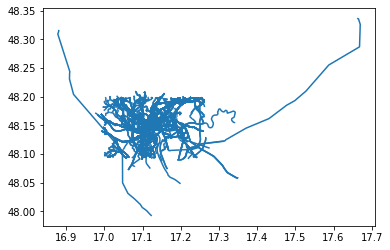

In [32]:
df.plot()

In [39]:
df[df["name"] == "Bus 92: Vozovňa Petržalka => Opletalova, VW5 => Jána Jonáša, VW1"].to_crs("epsg:4326").length

<ipython-input-39-e022ba44ddb9>:1: UserWarning:

Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




8    0.196443
dtype: float64

In [33]:
df.length

<ipython-input-33-6c0e831f20c8>:1: UserWarning:

Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0      0.077863
1      0.349935
2      0.158060
3      0.073161
4      0.017530
         ...   
717    0.063368
718    0.008003
719    0.005661
720    0.012062
721    0.012041
Length: 722, dtype: float64

In [47]:
from geojson_length import calculate_distance, Unit
from geojson import MultiLineString
import geojson

In [45]:
with open('./data/bus/bus_lines.geojson', 'r') as f:
    bus_geojson = geojson.load(f)

In [94]:
len(bus_lines_only)

398

In [92]:
# Keep only bus lines
bus_lines_only = [x for x in bus_geojson.features if 'bus' in str(x.properties['name']).lower()]

for feature in bus_lines_only:
    print(feature.properties['name'])
    print(calculate_distance(feature, Unit.meters))
    print(feature.geometry.coordinates)
    
    break
#     print(feature.properties['name'])

Bus 79: Čiližská => Lieskovec => Topoľové
9793.763137666221
[[[17.211972, 48.145029], [17.211717, 48.145366], [17.211629, 48.145485], [17.211488, 48.145671], [17.211437, 48.145736], [17.211282, 48.145935]], [[17.211282, 48.145935], [17.211216, 48.146022], [17.211143, 48.146119], [17.210995, 48.146298], [17.210909, 48.1464], [17.210829, 48.146491], [17.210737, 48.146584], [17.210644, 48.146673], [17.210482, 48.14682], [17.210314, 48.146962], [17.210197, 48.147061], [17.209944, 48.147243]], [[17.209944, 48.147243], [17.209824, 48.147332], [17.209766, 48.147371], [17.2097, 48.147412], [17.209629, 48.147465], [17.209495, 48.147515], [17.209405, 48.147549], [17.209323, 48.147574], [17.209148, 48.147617]], [[17.209148, 48.147617], [17.208988, 48.147673], [17.208782, 48.14771], [17.208552, 48.147735], [17.208108, 48.147784], [17.2078, 48.147835], [17.207517, 48.147902], [17.207276, 48.14797], [17.207202, 48.148], [17.207157, 48.148036], [17.207095, 48.148099]], [[17.206902, 48.148228], [17.20

In [91]:
bus_geojson.features[10].properties

{'osm_id': '131282',
 'name': 'Bus 26: Pri kríži => Opletalova, VW5 => Jána Jonáša, VW1',
 'type': 'route',
 'other_tags': '"from"=>"Pri kríži","network"=>"MHD Bratislava","operator"=>"DPB","public_transport:version"=>"2","ref"=>"26","route"=>"bus","to"=>"Jána Jonáša, VW1","via"=>"Opletalova, VW5"'}

[{"geometry": {"coordinates": [[[17.211972, 48.145029], [17.211717, 48.145366], [17.211629, 48.145485], [17.211488, 48.145671], [17.211437, 48.145736], [17.211282, 48.145935]], [[17.211282, 48.145935], [17.211216, 48.146022], [17.211143, 48.146119], [17.210995, 48.146298], [17.210909, 48.1464], [17.210829, 48.146491], [17.210737, 48.146584], [17.210644, 48.146673], [17.210482, 48.14682], [17.210314, 48.146962], [17.210197, 48.147061], [17.209944, 48.147243]], [[17.209944, 48.147243], [17.209824, 48.147332], [17.209766, 48.147371], [17.2097, 48.147412], [17.209629, 48.147465], [17.209495, 48.147515], [17.209405, 48.147549], [17.209323, 48.147574], [17.209148, 48.147617]], [[17.209148, 48.147617], [17.208988, 48.147673], [17.208782, 48.14771], [17.208552, 48.147735], [17.208108, 48.147784], [17.2078, 48.147835], [17.207517, 48.147902], [17.207276, 48.14797], [17.207202, 48.148], [17.207157, 48.148036], [17.207095, 48.148099]], [[17.206902, 48.148228], [17.206871, 48.148232], [17.206838, 